In [1]:
import sys
sys.path.append('../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#exceção Cross Validation do sklearn
from sklearn.model_selection import cross_val_score 

from g_ml.utilidades.processamento import treino_teste
from g_ml.utilidades.processamento import escala_padrao

from g_ml.utilidades.metricas import ACC
from g_ml.utilidades.metricas import relatorio_classificacao

from g_ml.algoritmos.classificacao import RegressaoLogistica
from g_ml.algoritmos.classificacao import ADG







In [2]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

In [3]:
# Separação em treino e teste
X_treino, X_teste, y_treino, y_teste = treino_teste(X, y, tamanho_teste = 0.33)

In [4]:
escalador_X = escala_padrao()

escalador_X.fit(X_treino)

X_treino_escalado = escalador_X.transform(X_treino)
X_teste_escalado = escalador_X.transform(X_teste)

In [5]:
## Modelo dumb para baseline

In [6]:
np.unique(y_treino, return_counts=True)

(array([0, 1]), array([146, 236], dtype=int64))

In [7]:
y_base = np.ones(len(y_teste))
print("A acurácia base de um modelo inocente é: {}".format(ACC(y_base, y_teste)))

A acurácia base de um modelo inocente é: 0.6470588235294118


# Regressão Logística com Gradiente Descendente

In [8]:
RL = RegressaoLogistica()
RL.fit(X_treino_escalado, y_treino)
y_pred = RL.predict(X_teste_escalado)
print(ACC(y_teste,y_pred))


0.893048128342246


In [9]:
RL.w

array([-1.41657945, -1.27858125, -1.34292182, -1.48269858, -1.71866249,
       -1.72682365, -1.47178989, -1.16990309, -1.34820507, -1.70568459,
       -1.44608623, -1.2364339 , -1.10611114, -1.19168054, -1.05498609,
       -1.51558961, -1.12294001, -1.4194684 , -1.36593531, -0.89890567,
       -1.11180547, -1.47607762, -1.00493379, -0.89678261, -1.15793317,
       -1.59960755, -1.28591578, -1.44396794, -1.42309417, -1.75127659,
       -1.15776981])

In [10]:
scores = relatorio_classificacao(y_pred, y_teste)

In [11]:
scores.print_scores()

A acurácia do modelo é de: 0.893048128342246 
A precisão do modelo é de: 0.9243697478991597
A revocacão do modelo é de: 0.9090909090909091
O f1_score do modelo é de: 0.9166666666666667


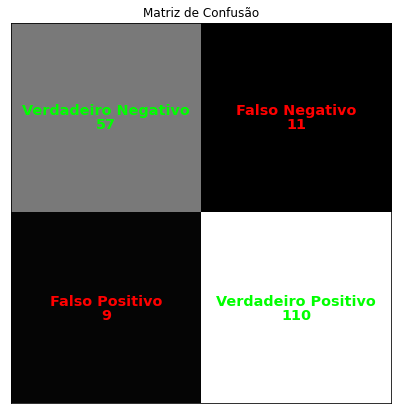

In [12]:
scores.plot_scores()

In [13]:
## TESTE
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_treino_escalado, y_treino)
y_pred2 = model.predict(X_teste_escalado)
print(accuracy_score(y_pred2,y_teste))

0.9893048128342246


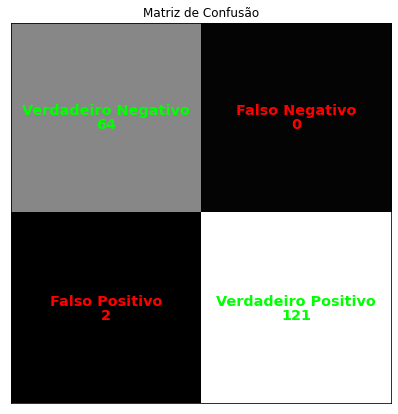

In [28]:
scores = relatorio_classificacao(y_pred2, y_teste)
scores.plot_scores()


# Análise de Discriminante Gaussiano

In [25]:
adg = ADG()
adg.fit(X_treino_escalado, y_treino)
y_pred = adg.predict(X_teste_escalado)
print(ACC(y_pred, y_teste))

0.9358288770053476


In [26]:
scores = relatorio_classificacao(y_pred, y_teste)
scores.print_scores()

A acurácia do modelo é de: 0.9358288770053476 
A precisão do modelo é de: 1.0
A revocacão do modelo é de: 0.9008264462809917
O f1_score do modelo é de: 0.9478260869565218


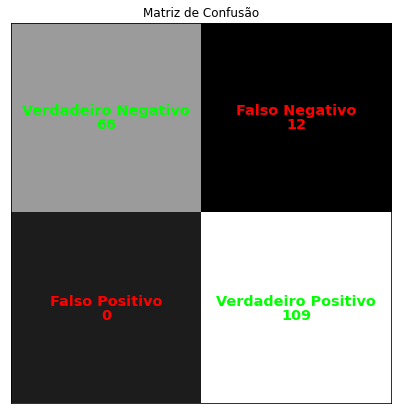

In [27]:
scores.plot_scores()

In [18]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [19]:
classes = np.unique(y)
np.array([ np.sum(y == k) for k in classes])/y.shape[0]

array([0.37258348, 0.62741652])

In [20]:
classes = np.unique(y)

In [21]:
(y == 0).sum()/len(y)

0.37258347978910367

In [22]:
prioris = []
for classe in classes:
    prioris.append((y == classe).sum()/len(y))

In [23]:
prioris

[0.37258347978910367, 0.6274165202108963]